In [1]:
import random
import pandas as pd
import numpy as np 
from tabulate import tabulate
from statistics import mean

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

In [2]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

## 1.2) Carregar os dados de treinamento e teste

In [3]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [4]:
def train_naive_bayes(X_train, y_train):

    naive = GaussianNB(var_smoothing=1e-9, priors=[0.4, 0.3, 0.3])

    cv_scores = cross_val_score(naive, X_train, y_train, cv=5, scoring='accuracy')
    f1_per_fold = cross_val_score(naive, X_train, y_train, cv=5, scoring='f1_weighted')
    recall_per_fold = cross_val_score(naive, X_train, y_train, cv=5, scoring='recall_weighted')
    precision_per_fold = cross_val_score(naive, X_train, y_train, cv=5, scoring='precision_weighted')

    naive.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy_mean = mean(cv_scores)
    f1_mean = mean(f1_per_fold)
    recall_mean = mean(recall_per_fold)
    precision_mean = mean(precision_per_fold)

    return accuracy_mean, f1_mean, recall_mean, precision_mean, naive

## 1.4) Carregando dados e treinando (Cross validation)

In [5]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_naive_bayes(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.8771428571428572
F1: 0.8764627363536408
Revocação: 0.8771428571428572
Precisão: 0.8800306044175944

Conjunto 2
Acurácia: 0.8528571428571429
F1: 0.8528471432568676
Revocação: 0.8528571428571429
Precisão: 0.8550118081688123

Conjunto 3
Acurácia: 0.8357142857142857
F1: 0.8362000025239266
Revocação: 0.8357142857142857
Precisão: 0.8410164852036317

Conjunto 4
Acurácia: 0.85
F1: 0.8488648259368663
Revocação: 0.85
Precisão: 0.855187708463896

Conjunto 5
Acurácia: 0.8542857142857143
F1: 0.85395774379429
Revocação: 0.8542857142857143
Precisão: 0.8556163650808501

Conjunto 6
Acurácia: 0.86
F1: 0.8601982778386686
Revocação: 0.86
Precisão: 0.8618459996939294

Conjunto 7
Acurácia: 0.8657142857142857
F1: 0.8648237706844903
Revocação: 0.8657142857142857
Precisão: 0.8676936775421523

Conjunto 8
Acurácia: 0.8742857142857143
F1: 0.8740984185498383
Revocação: 0.8742857142857143
Precisão: 0.8753897221059017

Conjunto 9
Acurácia: 0.8714285714285714
F1: 0.8705501100141024
Revocação: 

In [6]:
# Criar um DataFrame com os resultados
resultados_acuracia_percent = [f"{acuracia * 100:.2f}%" for acuracia in resultados_acuracia]
resultados_precisao_percent = [f"{precisao * 100:.2f}%" for precisao in resultados_precisao]
resultados_revocacao_percent = [f"{revocacao * 100:.2f}%" for revocacao in resultados_revocacao]
resultados_f1_percent = [f"{f1 * 100:.2f}%" for f1 in resultados_f1]

# Criar um DataFrame com os resultados
data = {
    'Conjunto': [f'Conjunto {i+1}' for i in range(conjuntos)],
    'Acurácia': resultados_acuracia_percent,
    'Precisão': resultados_precisao_percent,
    'Revocação': resultados_revocacao_percent,
    'F1': resultados_f1_percent
}

df_resultados = pd.DataFrame(data)

print("# Resultados Médios do treinamento em 10 Conjuntos de Dados\n")
print(df_resultados.to_markdown(index=False))

# Resultados Médios do treinamento em 10 Conjuntos de Dados

| Conjunto    | Acurácia   | Precisão   | Revocação   | F1     |
|:------------|:-----------|:-----------|:------------|:-------|
| Conjunto 1  | 87.71%     | 88.00%     | 87.71%      | 87.65% |
| Conjunto 2  | 85.29%     | 85.50%     | 85.29%      | 85.28% |
| Conjunto 3  | 83.57%     | 84.10%     | 83.57%      | 83.62% |
| Conjunto 4  | 85.00%     | 85.52%     | 85.00%      | 84.89% |
| Conjunto 5  | 85.43%     | 85.56%     | 85.43%      | 85.40% |
| Conjunto 6  | 86.00%     | 86.18%     | 86.00%      | 86.02% |
| Conjunto 7  | 86.57%     | 86.77%     | 86.57%      | 86.48% |
| Conjunto 8  | 87.43%     | 87.54%     | 87.43%      | 87.41% |
| Conjunto 9  | 87.14%     | 87.45%     | 87.14%      | 87.06% |
| Conjunto 10 | 87.29%     | 87.60%     | 87.29%      | 87.31% |


## 1.5) Analisando resultados gerais

In [7]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.861429  0.864229   0.861429  0.861106


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


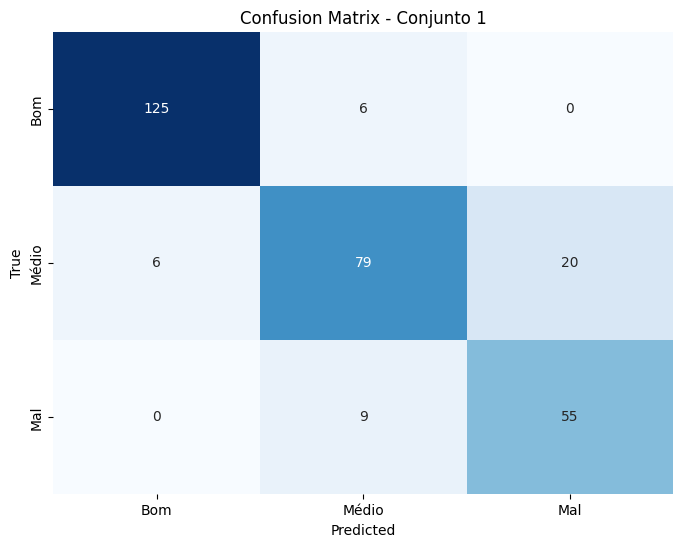

Acurácia no conjunto de teste: 86.33%

Precisão no conjunto de teste: 86.73%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      0.95      0.95       131
       Medio       0.84      0.75      0.79       105
        Ruim       0.73      0.86      0.79        64

    accuracy                           0.86       300
   macro avg       0.84      0.86      0.85       300
weighted avg       0.87      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 2


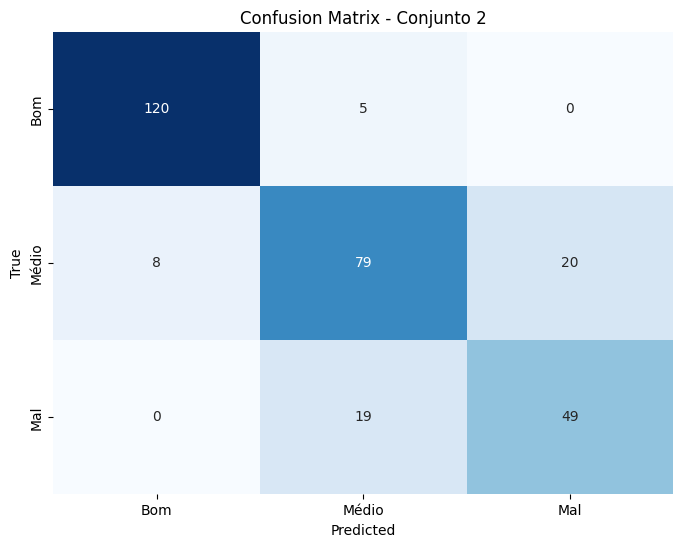

Acurácia no conjunto de teste: 82.67%

Precisão no conjunto de teste: 82.52%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.96      0.95       125
       Medio       0.77      0.74      0.75       107
        Ruim       0.71      0.72      0.72        68

    accuracy                           0.83       300
   macro avg       0.80      0.81      0.81       300
weighted avg       0.83      0.83      0.83       300


----------------------------------------------------------------

Eficácia do conjunto 3


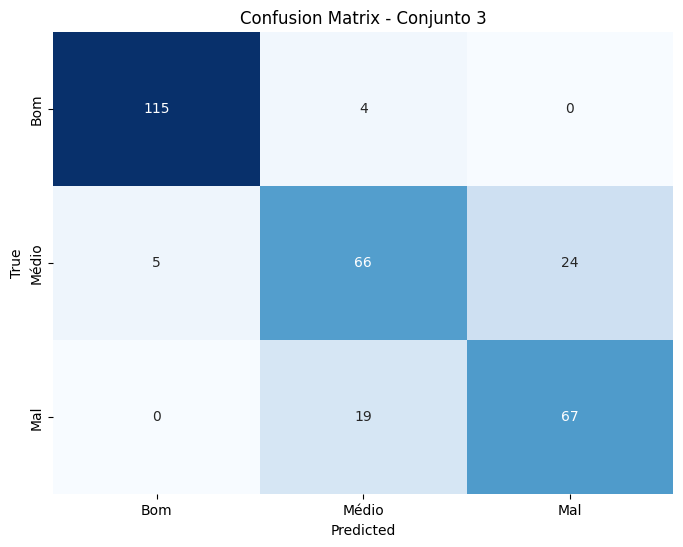

Acurácia no conjunto de teste: 82.67%

Precisão no conjunto de teste: 82.60%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.97      0.96       119
       Medio       0.74      0.69      0.72        95
        Ruim       0.74      0.78      0.76        86

    accuracy                           0.83       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.83      0.83      0.83       300


----------------------------------------------------------------

Eficácia do conjunto 4


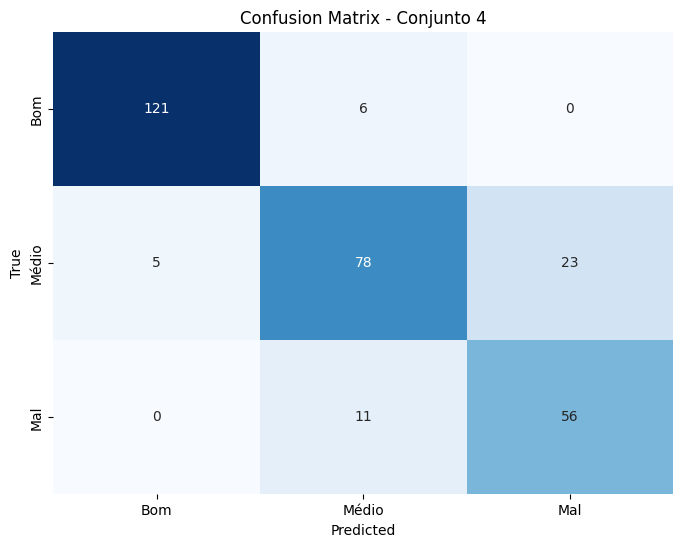

Acurácia no conjunto de teste: 85.00%

Precisão no conjunto de teste: 85.50%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.95      0.96       127
       Medio       0.82      0.74      0.78       106
        Ruim       0.71      0.84      0.77        67

    accuracy                           0.85       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.85      0.85      0.85       300


----------------------------------------------------------------

Eficácia do conjunto 5


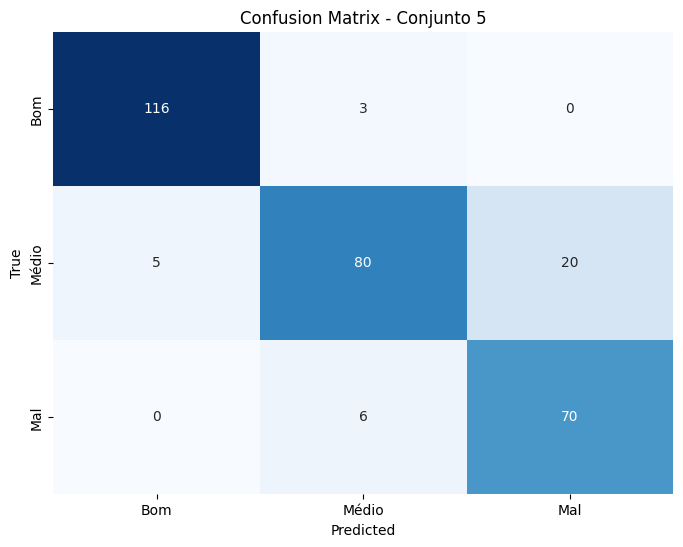

Acurácia no conjunto de teste: 88.67%

Precisão no conjunto de teste: 89.19%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.97      0.97       119
       Medio       0.90      0.76      0.82       105
        Ruim       0.78      0.92      0.84        76

    accuracy                           0.89       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.89      0.89       300


----------------------------------------------------------------

Eficácia do conjunto 6


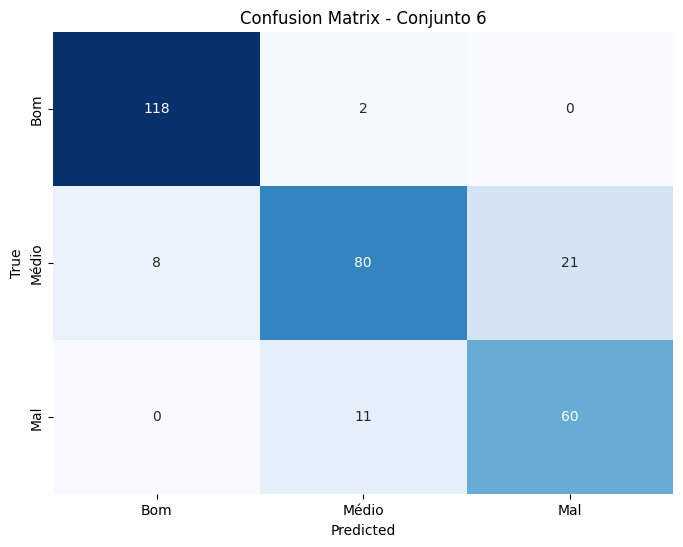

Acurácia no conjunto de teste: 86.00%

Precisão no conjunto de teste: 86.25%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.98      0.96       120
       Medio       0.86      0.73      0.79       109
        Ruim       0.74      0.85      0.79        71

    accuracy                           0.86       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 7


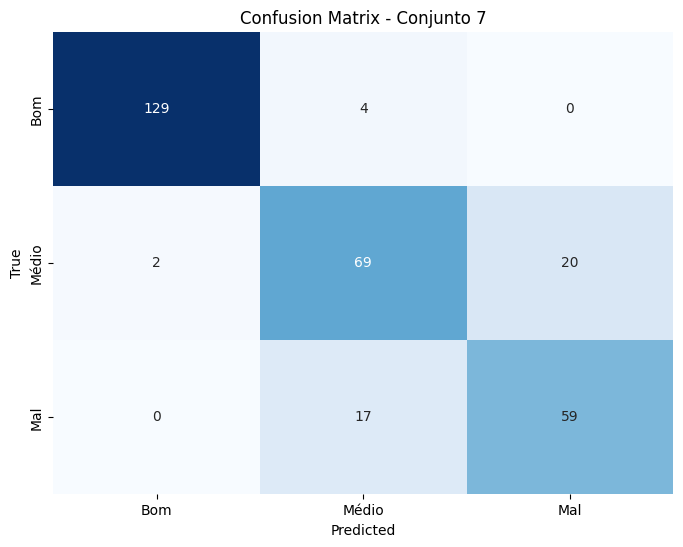

Acurácia no conjunto de teste: 85.67%

Precisão no conjunto de teste: 85.83%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.97      0.98       133
       Medio       0.77      0.76      0.76        91
        Ruim       0.75      0.78      0.76        76

    accuracy                           0.86       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.86      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 8


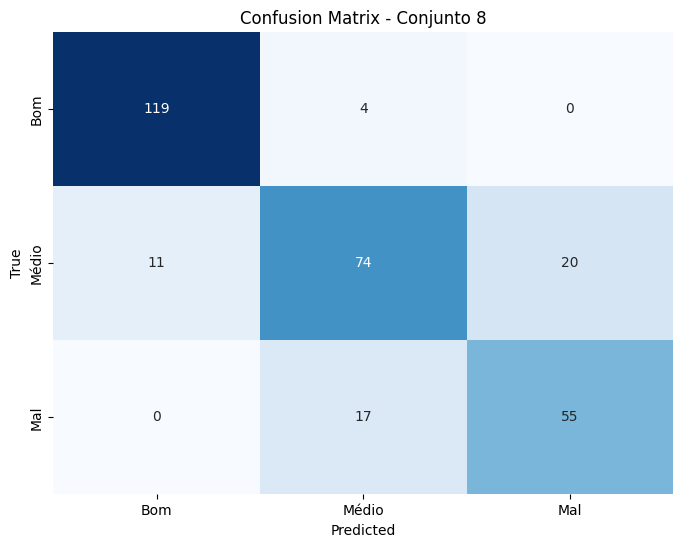

Acurácia no conjunto de teste: 82.67%

Precisão no conjunto de teste: 82.39%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.92      0.97      0.94       123
       Medio       0.78      0.70      0.74       105
        Ruim       0.73      0.76      0.75        72

    accuracy                           0.83       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.83      0.82       300


----------------------------------------------------------------

Eficácia do conjunto 9


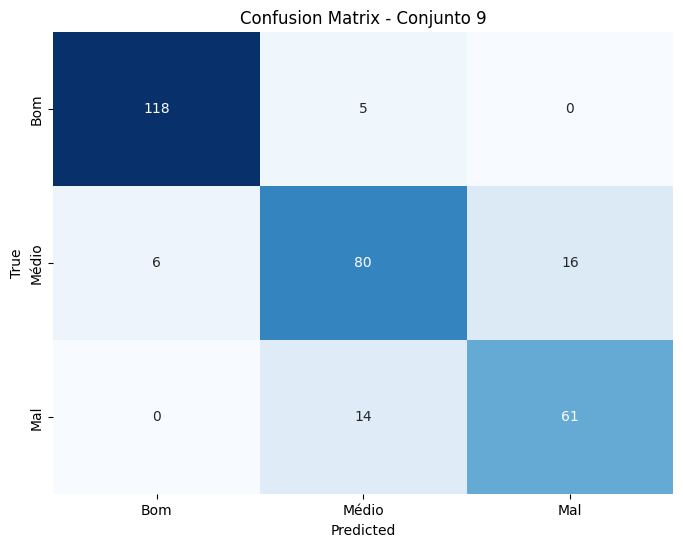

Acurácia no conjunto de teste: 86.33%

Precisão no conjunto de teste: 86.30%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      0.96      0.96       123
       Medio       0.81      0.78      0.80       102
        Ruim       0.79      0.81      0.80        75

    accuracy                           0.86       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 10


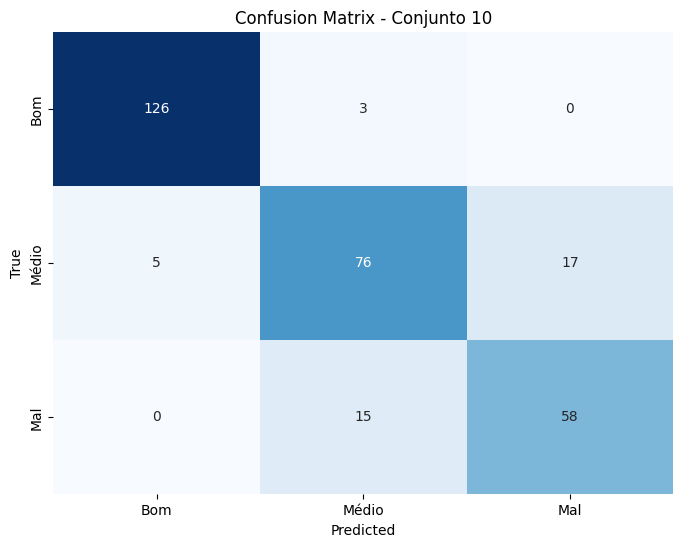

Acurácia no conjunto de teste: 86.67%

Precisão no conjunto de teste: 86.59%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.98      0.97       129
       Medio       0.81      0.78      0.79        98
        Ruim       0.77      0.79      0.78        73

    accuracy                           0.87       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.87      0.87      0.87       300


----------------------------------------------------------------



In [8]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
average_precisions = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')

    # Precisao do modelo
    precision = precision_score(y_test, y_pred, average='weighted')

    # Append precisions to the list
    average_precisions.append(precision)

    print(f'Precisão no conjunto de teste: {precision * 100:.2f}%\n')

    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [9]:
# Find the index of the conjunto with the highest average accuracy
accuracy_mean = mean(average_accuracies)
precision_mean = mean(average_precisions)

best_conjunto_index = np.argmax(average_accuracies)

# Acuracia media de todos os conjuntos
print(f'Acurácia média de todos os conjuntos: {accuracy_mean * 100:.2f}%')

# Precisao media de todos os conjuntos
print(f'Precisão média de todos os conjuntos: {precision_mean * 100:.2f}%')

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")

Acurácia média de todos os conjuntos: 85.27%
Precisão média de todos os conjuntos: 85.39%

O conjunto 5 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [10]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 3 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [11]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [12]:
param_grid = {
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2], [0.4, 0.3, 0.3]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2],
                                    [0.4, 0.3, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

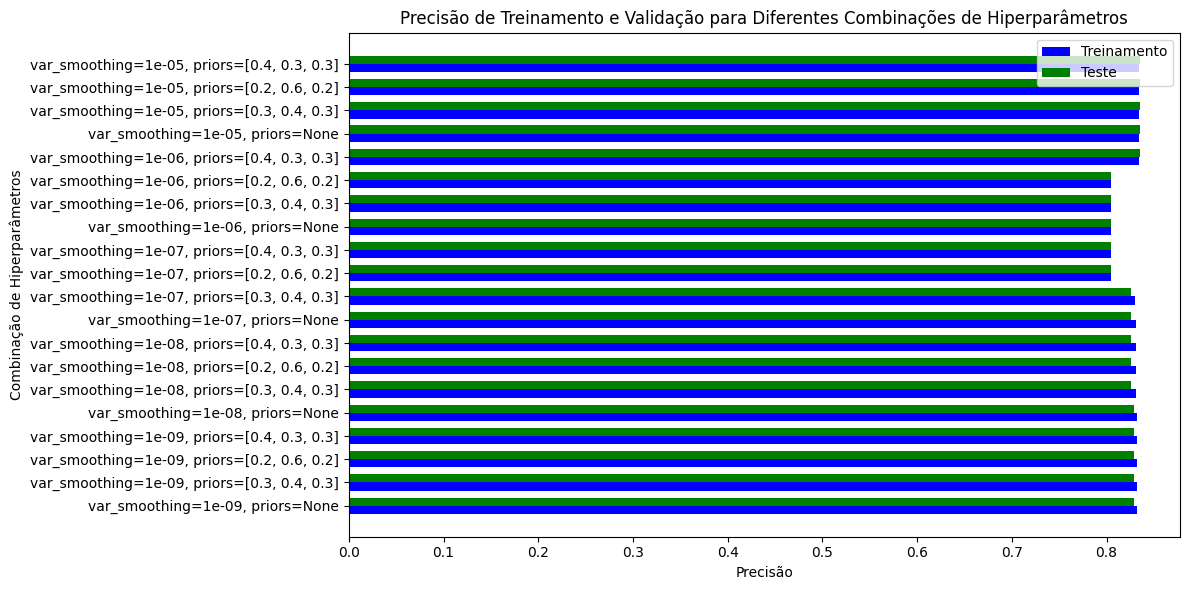

In [13]:
results = grid_search.cv_results_

param_combinations = [f'var_smoothing={var_smoothing}, priors={priors}' 
                      for var_smoothing in param_grid['var_smoothing'] 
                      for priors in param_grid['priors']]

train_scores = results['mean_train_score']

validations_scores = results['mean_test_score']

y_indices = np.arange(len(param_combinations))

bar_height = 0.35

plt.figure(figsize=(12, 6))
plt.barh(y_indices, train_scores, height=bar_height, label='Treinamento', color='b', align='center')
plt.barh(y_indices + bar_height, validations_scores, height=bar_height, label='Teste', color='g', align='center')

plt.ylabel('Combinação de Hiperparâmetros')
plt.xlabel('Precisão')
plt.title('Precisão de Treinamento e Validação para Diferentes Combinações de Hiperparâmetros')
plt.yticks(y_indices + bar_height / 2, param_combinations)
plt.legend()
plt.tight_layout()

plt.show()

## 2.4) Analisando Cada combinação para var_smoothing

In [14]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

### 2.5) Tabela comparativa para todas combinações

In [15]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                     │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'priors': None, 'var_smoothing': 1e-09}            │ 0.8325        │ 0.828571           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'priors': None, 'var_smoothing': 1e-08}            │ 0.8325        │ 0.828571           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'priors': None, 'var_smoothing': 1e-07}            │ 0.8325        │ 0.828571           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'priors': 

## 2.6) Predição para o melhor modelo

In [16]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

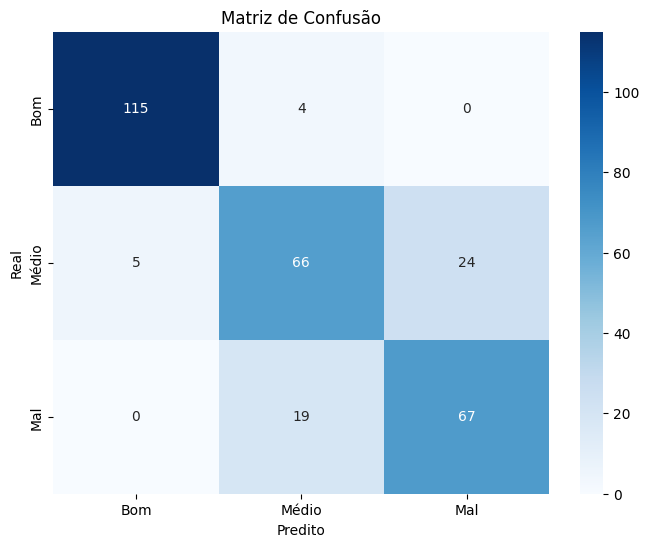

In [17]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [18]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': [0.4, 0.3, 0.3], 'var_smoothing': 1e-09}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.97      0.96       119
       Medio       0.74      0.69      0.72        95
        Ruim       0.74      0.78      0.76        86

    accuracy                           0.83       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.83      0.83      0.83       300

----------------------------------------------------------------

Acurácia: 0.8266666666666667
Precisão: 0.8260326206253172
Recall: 0.8266666666666667
Medida F: 0.825927823325649
